# Theory Questions (28%)

1) To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.

2) T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

3) A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

4) What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?

# Answers

1) Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

$$\begin{equation}
Accuracy = \frac{Number\space of\space Correct\space predictions}{Total\space number\space of\space predictions\space made}
\end{equation}
$$
It works well only if there are equal number of samples belonging to each class.
For example, consider that there are **99.67%** samples of class A and **0.33%** samples of class B in our training set. Then our model can easily get **99.67%** training accuracy by simply predicting every training sample belonging to class A.
When the same model is tested on a test set with **60%** samples of class A and **40%** samples of class B, then the test accuracy would drop down to **60%**. Classification Accuracy is great, but gives us the false sense of achieving high accuracy.
And exactly that is why we prefer in our case to use performance model, we have here not a huge number of data and we can get a better results. 

2)  In the **first case**, we have:

`Advantages`: implementation of visualizations is simple, less weight training (Less time spend to calculate).

`Disadvantages`: A decrease in the number of functions can lead to a lack of information in the output and an increase in the number of qualitative and quantitative classification errors.

In the **Second case**: 

`Advantages`: The number of functions is greater, as well as the potential reduction in the number of errors mentioned above, less chances to get bias.

`Disadvantages`: The complexity of processes as well as the speed of code execution increases, more risk for overfitting.

3) We will recommend the histologist to use the nonlinear SVM method, since it can * scale * data that at first glance looks inseparable, and accordingly there will be a possibility, a chance to find suitable boundaries by which the data can already be divided. It is theoretically possible to think of a situation in which it would be more profitable, more convenient and faster to use linear SVM or logistic regression, but in general, these methods are less accurate in cases with analyzes of histological samples.

4) **Logistic regression** focuses on maximizing the of the data. The farther the data lies from the separating hyperplane (on the correct side), the happier LR is.

An **SVM** tries to find the separating hyperplane that maximizes the distance of the closest points to the margin (the support vectors). If a point is not a support vector, it doesn’t really matter. 

**Logistic regression Hyperparameters**
Solver
This parameter can take few values such as ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’. The default value for this parameter is ’lbfgs’. Now the question arises when to use what. The answer to this is as follows:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
‘liblinear’ and ‘saga’ also handle L1 penalty
‘saga’ also supports ‘elasticnet’ penalty
‘liblinear’ does not support setting penalty='none'
2. Penalty

This parameter can take values such as ‘l1’, ‘l2’, ‘elasticnet’, ‘none’. The default value is ’l2’. Penalty is used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.

3. class_weightdict or ‘balanced’

If the classes are imbalance in the data then this parameter is used. The default value is None. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

4. multi_class

This parameter takes values ‘auto’, ‘ovr’, ‘multinomial’. The default value is ’auto’. If the option chosen is ‘ovr’, then a binary problem is fit for each label. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

***SVM Hyperparameters**

**Gamma $ (\gamma) $** is a hyperparameter used with non-linear SVM. One of the most commonly used non-linear kernels is the radial basis function (RBF). Gamma parameter of RBF controls the distance of the influence of a single training point.
Low values of gamma indicate a large similarity radius which results in more points being grouped together. For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to overfit.

There is obviously a trade-off between these two goals which and it is controlled by **C** which adds a penalty for each misclassified data point.
If C is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassification.
If C is large, SVM tries to minimize the number of misclassified examples due to the high penalty which results in a decision boundary with a smaller margin. The penalty is not the same for all misclassified examples. It is directly proportional to the distance to the decision boundary.

# Coding Asignment (72%)

**Question 1**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
import random
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 12
col_names = ['Age', 'Gender', 'Increased Urination', 'Increased Thirst',
       'Sudden Weight Loss', 'Weakness', 'Increased Hunger', 'Genital Thrush',
       'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing',
       'Partial Paresis', 'Muscle Stiffness', 'Hair Loss', 'Obesity',
       'Diagnosis', 'Family History']
# First of all, we will throw out all incomplete data (We got 522 persons instead of 565)
X = pd.read_csv("HW2_data.csv", header=None, names= col_names).dropna()
X=X.drop([0])
random.seed(2)
categorical_feature_mask = X.dtypes==object
categorical_cols = X.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
X.loc[:, 'Gender':'Diagnosis'] = X.loc[:, 'Gender':'Diagnosis'].apply(lambda col: le.fit_transform(col))
y = X['Diagnosis']
X.drop(columns='Diagnosis', inplace=True)
X = X.to_numpy() # can also be X.values
y = y.to_numpy() # can also be y.values
X = np.concatenate((np.ones((len(y), 1)), X), axis=1) # add bias term

**Question 2**

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)
X_train = X_train.astype(np.int32)
X_test = X_test.astype(np.int32)

**Question 3**

**Section A**

In [3]:
#  Part 3
train_percentages = X_train[:,2:18].sum(axis=0)/np.size(X_train,0)*100
train_percentages = train_percentages.astype(np.int32)
test_percentages = X_test[:,2:18].sum(axis=0)/np.size(X_test,0)*100
test_percentages = test_percentages.astype(np.int32)
delta = np.absolute(train_percentages - test_percentages)
array_of_arrays = np.array([train_percentages, test_percentages, delta])
array_of_arrays = np.swapaxes(array_of_arrays,0,1)
column_values = ['Train %', 'Test %', '|Delta| %']
Pos_feature = ['Gender', 'Increased Urination', 'Increased Thirst',
       'Sudden Weight Loss', 'Weakness', 'Increased Hunger', 'Genital Thrush',
       'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing',
       'Partial Paresis', 'Muscle Stiffness', 'Hair Loss', 'Obesity',
       'Family History']
df = pd.DataFrame(data = array_of_arrays,
                  index = Pos_feature,
                  columns = column_values)
print (df)
# print('the naive classifier achieved an accuracy of %.2f%' % (100*y_test.value_counts()['B']/len(y_test)))

                     Train %  Test %  |Delta| %
Gender                    62      63          1
Increased Urination       48      53          5
Increased Thirst          45      40          5
Sudden Weight Loss        41      40          1
Weakness                  55      69         14
Increased Hunger          45      44          1
Genital Thrush            22      22          0
Visual Blurring           44      44          0
Itching                   47      54          7
Irritability              25      18          7
Delayed Healing           44      53          9
Partial Paresis           42      42          0
Muscle Stiffness          35      42          7
Hair Loss                 33      40          7
Obesity                   15      20          5
Family History            51      46          5


**Answers:**
1) With this data, balanced training data, we can get the highest balanced accuracy, the average of True Positive Rate and True Negative Rate. The use of unbalanced training can lead, in turn, to a decrease in accuracy and, accordingly, we will receive false data. An imbalance in the data will mean poor accuracy.

2) The most obvious method is to increase the sample, thus decreasing the difference (delta).

**Section B**

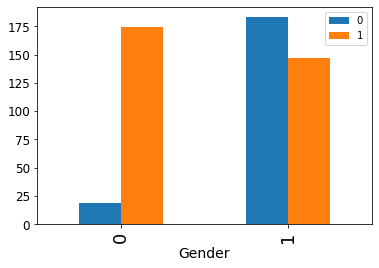

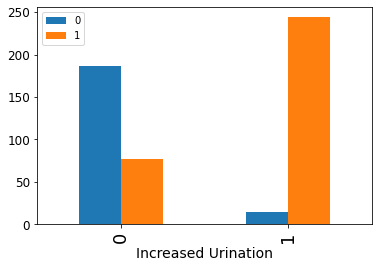

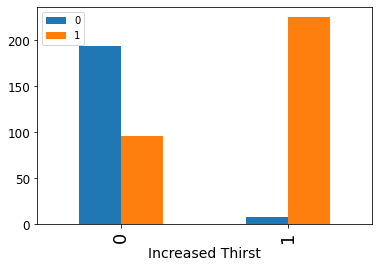

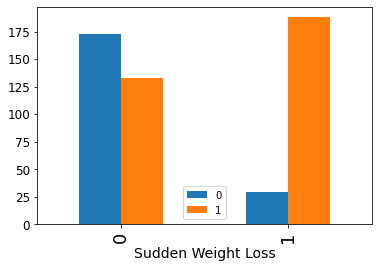

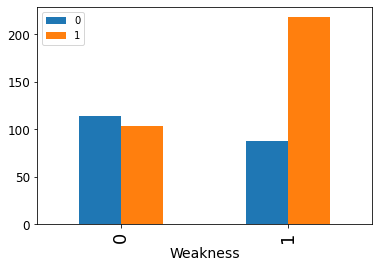

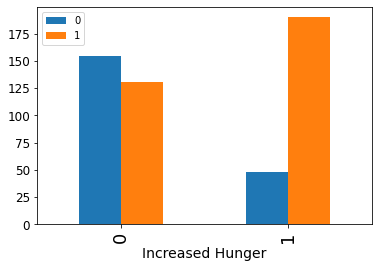

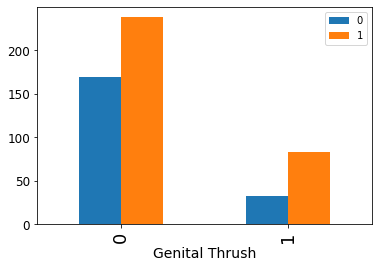

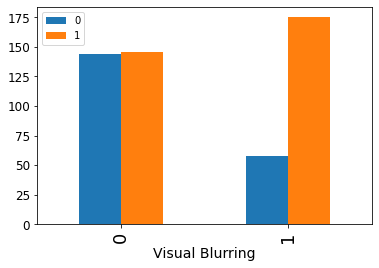

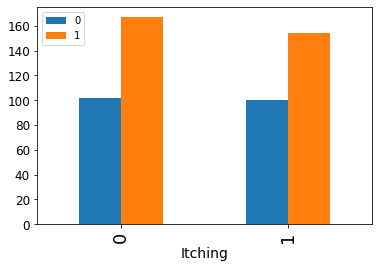

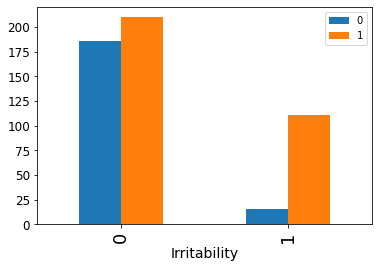

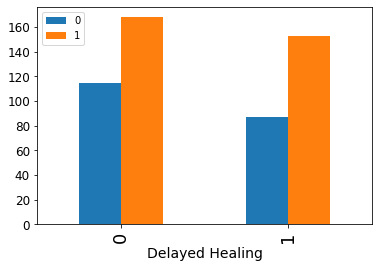

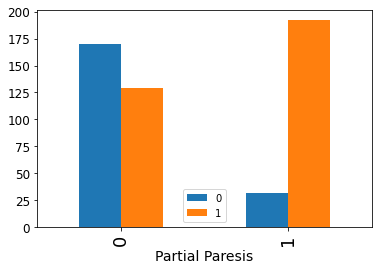

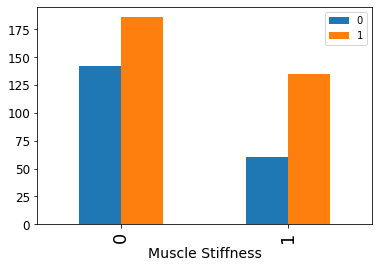

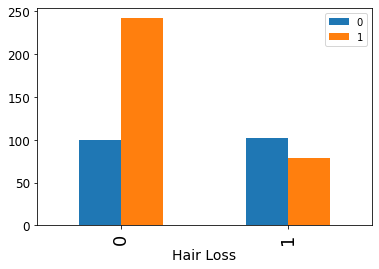

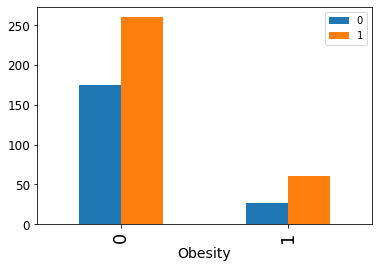

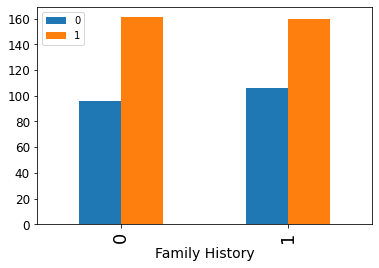

In [15]:
# Part 3b
X = pd.DataFrame(X, columns=('bias', 'Age', 'Gender', 'Increased Urination', 'Increased Thirst',
       'Sudden Weight Loss', 'Weakness', 'Increased Hunger', 'Genital Thrush',
       'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing',
       'Partial Paresis', 'Muscle Stiffness', 'Hair Loss', 'Obesity',
       'Family History'))
for f in X.columns:
    if f == "Age" or f == "bias":
        continue
    series = X.groupby([f,y]).size().unstack(level=1).plot(kind='bar')  #.label('Positive','Negative')
    plt.show() #.legend(([1,2])('negative','positive')) #.label('Positive','Negative')
    
    # left 2 coloumns - female, right 2 coloumns - male, blue - negative, orange - positive

**Section C**

**Section D**

1) In this case, we do not have enough profiles to make confident statements. There is a theory that type 1 diabetes occurs more often in childhood, before the age of 20, but such data are not enough in our sample.

2) 